<a href="https://colab.research.google.com/github/majorquev/Introduccion_a_ciencia_de_datos_R_v2/blob/main/Clases/Clase5/Clase5_1_reglas_de_asociacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 4: Reglas de asociación


**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales Méndez<br>
**E-mail ayudante:** rumorale1@gmail.com

Las reglas de asociación nos permiten identificar relaciones entre variables a través de grandes datasets. Es posible cuantificar que tan "fuerte" es la relación obtenida mediante diversas métricas de interés, entre las cuales se destacan el _lift_, _support_ y _confidence_ de una regla.

Para más detalles sobre la definición y algoritmo de generación de las reglas refiérase a la presentación de la clase 7 de este curso.




In [2]:
#install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(arules)
library(dplyr)
data(Groceries)
class(Groceries)



Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write



Attaching package: ‘dplyr’


The following objects are masked from ‘package:arules’:

    intersect, recode, setdiff, setequal, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "transactions"
attr(,"package")
[1] "arules"

    items                     
[1] {citrus fruit,            
     semi-finished bread,     
     margarine,               
     ready soups}             
[2] {tropical fruit,          
     yogurt,                  
     coffee}                  
[3] {whole milk}              
[4] {pip fruit,               
     yogurt,                  
     cream cheese ,           
     meat spreads}            
[5] {other vegetables,        
     whole milk,              
     condensed milk,          
     long life bakery product}
[6] {whole milk,              
     butter,                  
     yogurt,                  
     rice,                    
     abrasive cleaner}        


In [4]:
Groceries

transactions in sparse format with
 9835 transactions (rows) and
 169 items (columns)

In [5]:
inspect(head(Groceries, 6))

    items                     
[1] {citrus fruit,            
     semi-finished bread,     
     margarine,               
     ready soups}             
[2] {tropical fruit,          
     yogurt,                  
     coffee}                  
[3] {whole milk}              
[4] {pip fruit,               
     yogurt,                  
     cream cheese ,           
     meat spreads}            
[5] {other vegetables,        
     whole milk,              
     condensed milk,          
     long life bakery product}
[6] {whole milk,              
     butter,                  
     yogurt,                  
     rice,                    
     abrasive cleaner}        


In [6]:
 # Numero de items por observación mediante comndo size
size(head(Groceries,6))

[1] 4 3 1 4 4 5

In [7]:
 #LIST convierte las trasacciones a una lista (con mayusculas)
lista <- LIST(head(Groceries,6))

In [8]:
lista
class(lista)
str(lista)

[[1]]
[1] "citrus fruit"        "semi-finished bread" "margarine"          
[4] "ready soups"        

[[2]]
[1] "tropical fruit" "yogurt"         "coffee"        

[[3]]
[1] "whole milk"

[[4]]
[1] "pip fruit"     "yogurt"        "cream cheese " "meat spreads" 

[[5]]
[1] "other vegetables"         "whole milk"              
[3] "condensed milk"           "long life bakery product"

[[6]]
[1] "whole milk"       "butter"           "yogurt"           "rice"            
[5] "abrasive cleaner"

[1] "list"

List of 6
 $ : chr [1:4] "citrus fruit" "semi-finished bread" "margarine" "ready soups"
 $ : chr [1:3] "tropical fruit" "yogurt" "coffee"
 $ : chr "whole milk"
 $ : chr [1:4] "pip fruit" "yogurt" "cream cheese " "meat spreads"
 $ : chr [1:4] "other vegetables" "whole milk" "condensed milk" "long life bakery product"
 $ : chr [1:5] "whole milk" "butter" "yogurt" "rice" ...


In [ ]:
class(Groceries)

In [12]:
frequentItems <- eclat(Groceries, 
                        parameter = list(supp = 0.02)
                       ) # se calcula el support para items frecuentes

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE    0.02      1     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 196 

create itemset ... 
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [59 item(s)] done [0.00s].
creating sparse bit matrix ... [59 row(s), 9835 column(s)] done [0.00s].
writing  ... [122 set(s)] done [0.01s].
Creating S4 object  ... done [0.00s].


In [14]:
inspect(frequentItems)

      items                                         support   
[1]   {whole milk,frozen vegetables}                0.02043721
[2]   {beef,whole milk}                             0.02125064
[3]   {whole milk,curd}                             0.02613116
[4]   {pork,whole milk}                             0.02216573
[5]   {pork,other vegetables}                       0.02165735
[6]   {frankfurter,whole milk}                      0.02053889
[7]   {whole milk,bottled beer}                     0.02043721
[8]   {whole milk,brown bread}                      0.02521607
[9]   {whole milk,margarine}                        0.02419929
[10]  {whole milk,butter}                           0.02755465
[11]  {other vegetables,butter}                     0.02003050
[12]  {whole milk,newspapers}                       0.02735130
[13]  {whole milk,domestic eggs}                    0.02999492
[14]  {other vegetables,domestic eggs}              0.02226741
[15]  {whole milk,fruit/vegetable juice}            0.0

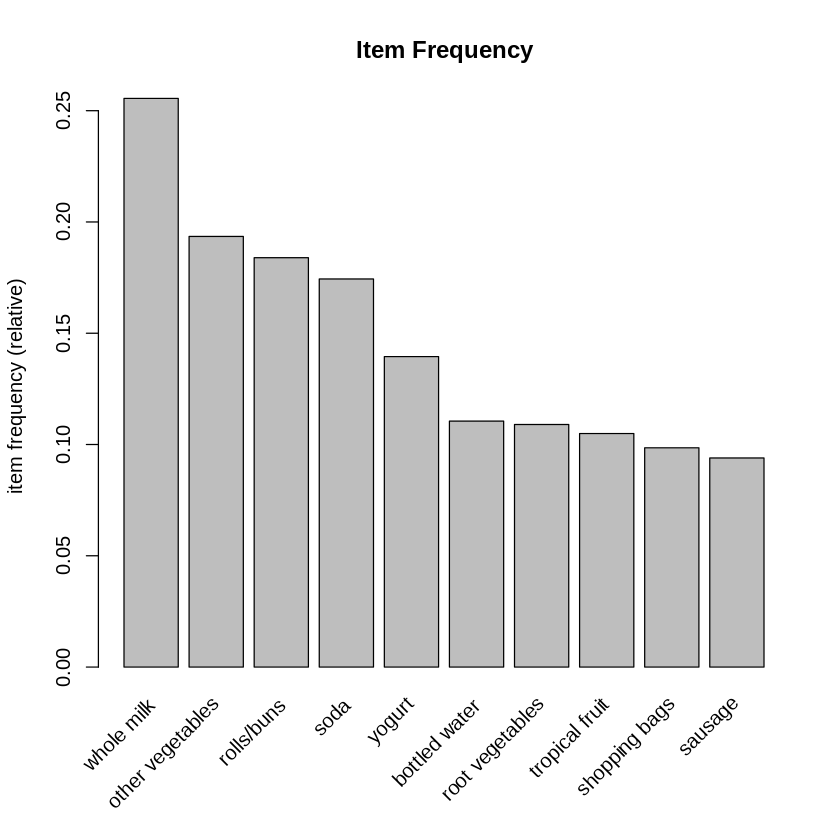

In [16]:
itemFrequencyPlot(Groceries,
                  topN=10, 
                  type="relative", 
                  main="Item Frequency") #podemos graficar los items frecuentes

## ¿Cómo determinamos las reglas?

In [17]:
rules <- apriori(data = Groceries, #debe ser del tipo "transactions"
                 parameter = list(supp=0.01, conf = 0.08),
                )
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.08    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [88 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [472 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 472 rules 

In [18]:
length(rules)
inspect(rules)

[1] 472

      lhs                           rhs                        support confidence   coverage      lift count
[1]   {}                         => {bottled beer}          0.08052872 0.08052872 1.00000000 1.0000000   792
[2]   {}                         => {pastry}                0.08896797 0.08896797 1.00000000 1.0000000   875
[3]   {}                         => {citrus fruit}          0.08276563 0.08276563 1.00000000 1.0000000   814
[4]   {}                         => {shopping bags}         0.09852567 0.09852567 1.00000000 1.0000000   969
[5]   {}                         => {sausage}               0.09395018 0.09395018 1.00000000 1.0000000   924
[6]   {}                         => {bottled water}         0.11052364 0.11052364 1.00000000 1.0000000  1087
[7]   {}                         => {tropical fruit}        0.10493137 0.10493137 1.00000000 1.0000000  1032
[8]   {}                         => {root vegetables}       0.10899847 0.10899847 1.00000000 1.0000000  1072
[9]   {}           

In [20]:
## Y si queremos buscar con qué combinar un producto determinado, por ejemplo leche
rules <- apriori( data = Groceries, 
                  parameter =list (supp=0.01, conf = 0.08, minlen = 2),
                  #appearance = list(default="rhs", lhs ="whole milk"),
                  control = list (verbose=F)) 

class(rules)
rules

[1] "rules"
attr(,"package")
[1] "arules"

set of 459 rules 

In [21]:
inspect(rules)

      lhs                           rhs                        support confidence   coverage      lift count
[1]   {hard cheese}              => {whole milk}            0.01006609 0.41078838 0.02450432 1.6076815    99
[2]   {butter milk}              => {other vegetables}      0.01037112 0.37090909 0.02796136 1.9169159   102
[3]   {butter milk}              => {whole milk}            0.01159126 0.41454545 0.02796136 1.6223854   114
[4]   {ham}                      => {whole milk}            0.01148958 0.44140625 0.02602949 1.7275091   113
[5]   {sliced cheese}            => {whole milk}            0.01077783 0.43983402 0.02450432 1.7213560   106
[6]   {oil}                      => {whole milk}            0.01128622 0.40217391 0.02806304 1.5739675   111
[7]   {onions}                   => {other vegetables}      0.01423488 0.45901639 0.03101169 2.3722681   140
[8]   {onions}                   => {whole milk}            0.01209964 0.39016393 0.03101169 1.5269647   119
[9]   {berries}    

In [22]:
rules_conf <- sort(rules, 
                   by="lift",
                   decreasing=TRUE) # ordenando por confidence rules.

In [23]:
rules
inspect(rules_conf)

set of 459 rules 

      lhs                           rhs                        support confidence   coverage      lift count
[1]   {whole milk,                                                                                          
       yogurt}                   => {curd}                  0.01006609 0.17967332 0.05602440 3.3723037    99
[2]   {citrus fruit,                                                                                        
       other vegetables}         => {root vegetables}       0.01037112 0.35915493 0.02887646 3.2950455   102
[3]   {other vegetables,                                                                                    
       yogurt}                   => {whipped/sour cream}    0.01016777 0.23419204 0.04341637 3.2670620   100
[4]   {tropical fruit,                                                                                      
       other vegetables}         => {root vegetables}       0.01230300 0.34277620 0.03589222 3.1447798   121
[5]   {root vegetab

## Transaformación a objetos de clase trasaction





In [ ]:
 ?transactions